<a href="https://colab.research.google.com/github/itsvish007/Machine-learning-project1/blob/main/Capstone_project_Credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low-income levels, or too many inquiries on an individual’s credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming. Fortunately, this task can be automated with the power of machine learning, and pretty much every commercial bank does so nowadays. In this project, we will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

**Aim**



* Performing necessary feature engineering step to clean clean and modify the data.

*   Identifying important features that may play important role to predict credit card approval
*   Predicitng credit card approval using a machine learning model







In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Credit_card.csv to Credit_card.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Credit_card_label.csv to Credit_card_label.csv


In [ ]:
df2 = pd.read_csv('Credit_card_label.csv')

In [ ]:
df2

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
data = pd.read_csv('Credit_card.csv')
df = data.copy()

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [ ]:
df.shape

(1548, 18)

In [ ]:
df.isnull()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Handling missing values

In [ ]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
df.isnull().sum().sum()

540

In [ ]:
df.isnull().sum()/len(df)

Ind_ID             0.000000
GENDER             0.004522
Car_Owner          0.000000
Propert_Owner      0.000000
CHILDREN           0.000000
Annual_income      0.014858
Type_Income        0.000000
EDUCATION          0.000000
Marital_status     0.000000
Housing_type       0.000000
Birthday_count     0.014212
Employed_days      0.000000
Mobile_phone       0.000000
Work_Phone         0.000000
Phone              0.000000
EMAIL_ID           0.000000
Type_Occupation    0.315245
Family_Members     0.000000
dtype: float64

In [ ]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)

def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input
    replaces the missing values of a particular column with the value from the previous row
    '''
    df[col] = df[col].fillna(method='ffill')


In [ ]:

fix_missing_ffill(df,'GENDER')
fix_missing_mean(df,'Annual_income')
fix_missing_mean(df,'Birthday_count')
fix_missing_ffill(df,'Type_Occupation')



In [ ]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    8
Family_Members     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in df:
  if df[col].dtype== 'object':
    df[col] = le.fit_transform(df[col])

In [ ]:
df = df.drop(['Mobile_phone' , 'Work_Phone' ,'Phone' ,'EMAIL_ID'  ], axis = 1)


In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,5008827,1,1,1,0,180000.00000,1,1,1,1,-18772.000000,365243,18,2
1,5009744,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,18,2
2,5009746,0,1,0,0,315000.00000,0,1,1,1,-16040.342071,-586,18,2
3,5009749,0,1,0,0,191399.32623,0,1,1,1,-13557.000000,-586,18,2
4,5009752,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,18,2


In [ ]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,5008827,1,1,1,0,180000.00000,1,1,1,1,-18772.000000,365243,18,2
1,5009744,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,18,2
2,5009746,0,1,0,0,315000.00000,0,1,1,1,-16040.342071,-586,18,2
3,5009749,0,1,0,0,191399.32623,0,1,1,1,-13557.000000,-586,18,2
4,5009752,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,191399.32623,0,1,1,1,-11957.000000,-2182,10,2
1544,5023655,0,0,0,0,225000.00000,0,2,3,1,-10229.000000,-1209,0,1
1545,5115992,1,1,1,2,180000.00000,3,1,1,1,-13174.000000,-2477,10,4
1546,5118219,1,1,0,0,270000.00000,3,4,0,1,-15292.000000,-645,4,2


In [ ]:
df3  = pd.merge(df,df2 )

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   int64  
 2   Car_Owner        1548 non-null   int64  
 3   Propert_Owner    1548 non-null   int64  
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   int64  
 7   EDUCATION        1548 non-null   int64  
 8   Marital_status   1548 non-null   int64  
 9   Housing_type     1548 non-null   int64  
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Type_Occupation  1548 non-null   int64  
 13  Family_Members   1548 non-null   int64  
 14  label            1548 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 193.5 KB


In [ ]:
df3.describe()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
count,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.368217,0.403101,0.652455,0.412791,1.913993e+05,1.870155,3.067829,1.435401,1.290052,-16040.342071,59364.689922,7.671835,2.161499,0.113049
std,4.171759e+04,0.482477,0.490679,0.476345,0.776691,1.124080e+05,1.271461,1.348675,0.980264,0.962371,4199.321477,137808.062701,4.249590,0.947772,0.316755
min,5.008827e+06,0.000000,0.000000,0.000000,0.000000,3.375000e+04,0.000000,0.000000,0.000000,0.000000,-24946.000000,-14887.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19476.000000,-3174.500000,4.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,0.000000,1.000000,0.000000,1.710000e+05,3.000000,4.000000,1.000000,1.000000,-15814.500000,-1565.000000,8.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,4.000000,2.000000,1.000000,-12483.000000,-431.750000,10.000000,3.000000,0.000000
max,5.150412e+06,1.000000,1.000000,1.000000,14.000000,1.575000e+06,3.000000,4.000000,4.000000,5.000000,-7705.000000,365243.000000,18.000000,15.000000,1.000000


In [ ]:
df3.corr()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
Ind_ID,1.000000,0.029035,-0.046811,-0.050421,0.032535,0.029888,0.026832,0.020761,0.014426,0.024882,0.022778,-0.055396,0.022312,0.016950,0.016796
GENDER,0.029035,1.000000,0.369247,-0.041906,0.065048,0.214223,0.064290,-0.038408,-0.121885,0.080287,0.184582,-0.177458,-0.028357,0.101703,0.048904
Car_Owner,-0.046811,0.369247,1.000000,0.002401,0.063467,0.209528,0.033180,-0.131209,-0.135318,-0.001358,0.144107,-0.150658,-0.029210,0.119851,-0.014734
Propert_Owner,-0.050421,-0.041906,0.002401,1.000000,-0.003352,0.043927,-0.057481,-0.018622,0.004493,-0.174783,-0.124128,0.100686,-0.016462,-0.004458,-0.017906
CHILDREN,0.032535,0.065048,0.063467,-0.003352,1.000000,0.078111,0.062820,-0.065007,-0.158954,0.003163,0.278041,-0.219095,-0.028457,0.890248,-0.021646
Annual_income,0.029888,0.214223,0.209528,0.043927,0.078111,1.000000,-0.132934,-0.243989,0.003976,0.012400,0.110111,-0.158957,0.023023,0.050677,0.026875
Type_Income,0.026832,0.064290,0.033180,-0.057481,0.062820,-0.132934,1.000000,0.100511,-0.032925,0.025516,0.171432,-0.309174,-0.083979,0.068909,-0.067856
EDUCATION,0.020761,-0.038408,-0.131209,-0.018622,-0.065007,-0.243989,0.100511,1.000000,0.051966,-0.044552,-0.189547,0.128430,0.032985,-0.064709,-0.027040
Marital_status,0.014426,-0.121885,-0.135318,0.004493,-0.158954,0.003976,-0.032925,0.051966,1.000000,-0.009247,-0.115922,0.177073,0.014460,-0.536331,0.057885
Housing_type,0.024882,0.080287,-0.001358,-0.174783,0.003163,0.012400,0.025516,-0.044552,-0.009247,1.000000,0.219229,-0.100222,0.002426,0.001763,-0.001610


<Axes: >

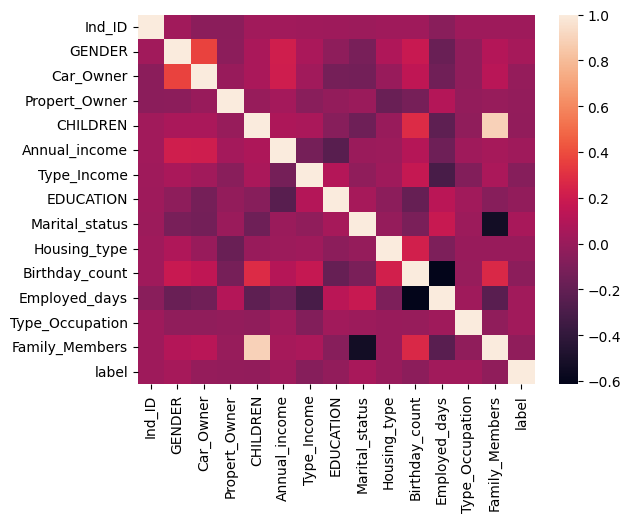

In [ ]:
import seaborn as sns
sns.heatmap(df3.corr())

Machine learning process


Splitting the dataset into train and test

In [ ]:
X = df3.drop('label', axis = 1)  #input columns
Y = df3['label'] #output column

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

**Machine Learning Classifiers**

Now we have our dataset ready for building a machine learning-based classifier. There are several classification models that can be used for this task. In this analysis, we will build five different types of classification models namely Logistic Regression, Decision Tree, Gradient Boost, XGBoost and, K-Nearest Neighbors (KNN). These are the most popular models used for solving classification problems. All these models can be conveniently implemented using python’s scikit-learn package except for the XGBoost model, which is implemented using the XGBoost package.

Before implementing logistic regression, we scale the feature variables of our dataset using sklearn’s MinMaxScaler method. We train the Logistic Regression model with standard parameters using the training dataset. The trained model is saved as logreg.

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

logistic regression

We evaluate the performance of our model using test dataset. We use the metric classification accuracy defined as the fraction of times model prediction matches the value of the target variable. For a detailed evaluation of our model, we look at the confusion matrix. The values in the diagonal of the confusion matrix denote the fraction of correct rejection (first-row first entry) or correct approval (second-row second entry) predictions by our classification model. Our logistic regression model has a classification accuracy of 88.9 %.

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

In [ ]:
# Fit logreg to the train set
logreg.fit(rescaledX_train, Y_train)

LogisticRegression()

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)
y_pred1 = logreg.predict(rescaledX_train)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledX_test,Y_test))
print("Train: Accuracy = ", logreg.score(rescaledX_train,Y_train))

# Print the confusion matrix of the logreg model
confusion_matrix(Y_test,y_pred)

Test: Accuracy =  0.8774193548387097
Train: Accuracy =  0.8893376413570274


array([[272,   0],
       [ 38,   0]])

Decision Tree

The second model we try for our classification task is the Decision tree model. We have used sklearn’s DecisionTreeClassifier algorithm to build the model. We find the optimized value of hyperparameter max_depth by varying it between 1 and 10 in steps of 1. max_depth value decides the number of times a decision tree is allowed to split. In the plot of Accuracy vs Depth for train and test data, we see for max_depth =3 both train and test accuracy are the same. We choose this value for our model as it avoids a model that is either overfitted or underfittted. The final test accuracy score of our decision tree model is 89 %.

In [ ]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):

    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(X_train, Y_train)

    train_pred = dtc.predict(X_train)
    #train_acc.append(score(train_pred, yTrain))

    test_pred = dtc.predict(X_test)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(Y_test, test_pred)
    train_acc = accuracy_score(Y_train, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, Y_train),accuracy_score(test_pred, Y_test)])




1 Train score: 0.8941841680129241 Test score: 0.8838709677419355
2 Train score: 0.8941841680129241 Test score: 0.8838709677419355
3 Train score: 0.8941841680129241 Test score: 0.8838709677419355
4 Train score: 0.8974151857835219 Test score: 0.8903225806451613
5 Train score: 0.9046849757673667 Test score: 0.8870967741935484
6 Train score: 0.9176090468497576 Test score: 0.896774193548387
7 Train score: 0.9264943457189014 Test score: 0.8903225806451613
8 Train score: 0.9353796445880452 Test score: 0.8806451612903226
9 Train score: 0.944264943457189 Test score: 0.8774193548387097


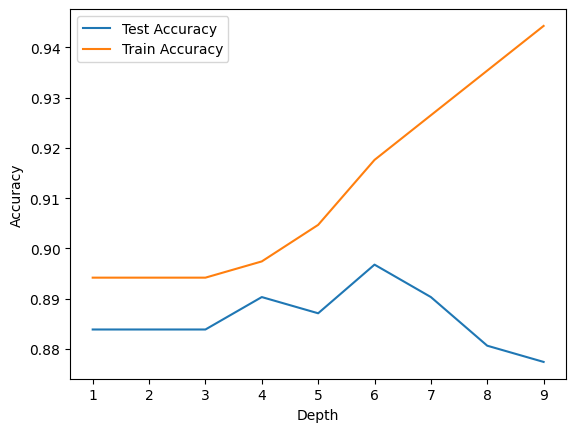

In [ ]:
df3 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df3['Depth'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['Depth'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

Gradient Boost

The third model we try for our classification task is the Gradient Boost. For the gradient boost, we use sklearn’s default hyperparameter value. It gives us an accuracy of 93% and 90% on train and test datasets respectively.

In [ ]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, Y_train)

train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)


test_acc = accuracy_score(Y_test, test_predict)
train_acc = accuracy_score(Y_train, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)


Train score: 0.9305331179321487 Test score: 0.9064516129032258


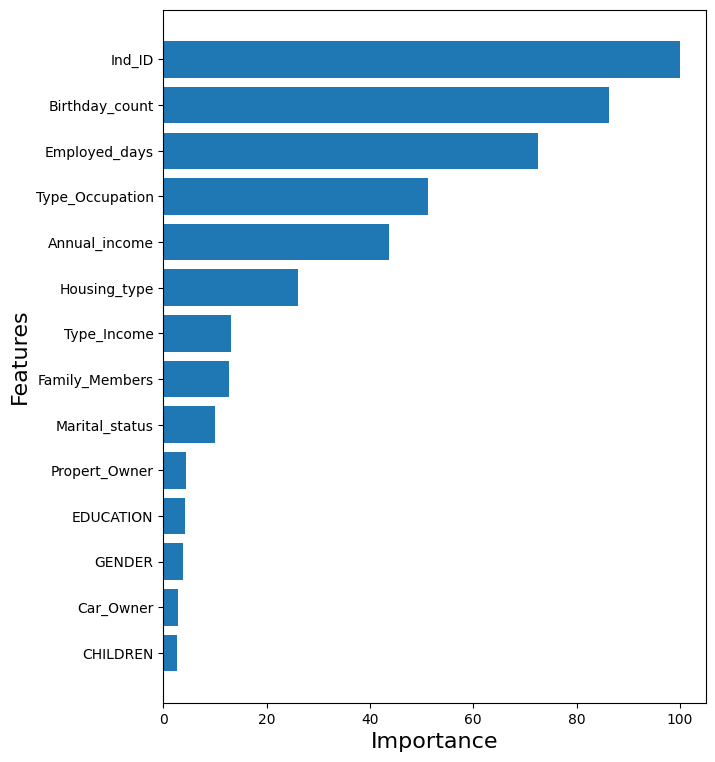

In [ ]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()

XG Boost

The fourth model we try for our classification task is the XGBoost. We built this model using the XGBClassifier algorithm provided by the XGBoost package. Using the XGBoost model with default values for hyperparameters, we obtained an accuracy of 92% on the test dataset.

In [ ]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, Y_train)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

test_acc = accuracy_score(Y_test, test_predict)
train_acc = accuracy_score(Y_train, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.9983844911147012 Test score: 0.9193548387096774


KNN

The fifth model we try for our classification task is the K-Nearest Neighbors (KNN). We have built the model using sklearn’s KNeighborsClassifier algorithm. We have optimized the hyperparameter n_neighbors by iterating through a range of values from n=2 to n=20 and comparing the accuracy scores. We select the value n_neighbors=10 as it avoids both overfitting and underfitting. With 10 neighbors, the accuracy score on the test sample is 88%.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,Y_train)

    train_predict = knn.predict(X_train)
    test_predict = knn.predict(X_test)

    test_acc = accuracy_score(Y_test, test_predict)
    train_acc = accuracy_score(Y_train, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, Y_train),accuracy_score(test_predict, Y_test)])




Train score: 0.9434571890145396 Test score: 0.8870967741935484
2 Train score: 0.9434571890145396 Test score: 0.8870967741935484
Train score: 0.932956381260097 Test score: 0.8709677419354839
3 Train score: 0.932956381260097 Test score: 0.8709677419354839
Train score: 0.9054927302100162 Test score: 0.8741935483870967
4 Train score: 0.9054927302100162 Test score: 0.8741935483870967
Train score: 0.8982229402261712 Test score: 0.864516129032258
5 Train score: 0.8982229402261712 Test score: 0.864516129032258
Train score: 0.8917609046849758 Test score: 0.8741935483870967
6 Train score: 0.8917609046849758 Test score: 0.8741935483870967
Train score: 0.8885298869143781 Test score: 0.8709677419354839
7 Train score: 0.8885298869143781 Test score: 0.8709677419354839
Train score: 0.8893376413570274 Test score: 0.8741935483870967
8 Train score: 0.8893376413570274 Test score: 0.8741935483870967
Train score: 0.8893376413570274 Test score: 0.8741935483870967
9 Train score: 0.8893376413570274 Test score:

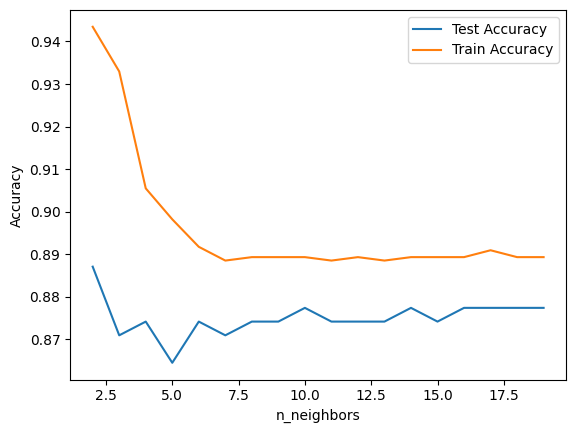

In [ ]:
df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

**Conclusion**


We have tried five different classification models for our credit card approval prediction task. The train and test accuracy of the models is summarized in the Figure below. We have obtained the best test data accuracy (90%) from the Gradient Boost classifier. The small difference in train and test accuracy scores indicates the absence of overfitting and underfitting.